# Method: Gaussian Process Regression (GPR)

This notebook introduces an application of the scitkit-learn implementation of gaussian process regression.

### Imports

In [103]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.kernel_ridge import KernelRidge
from scipy.stats import norm

### Example

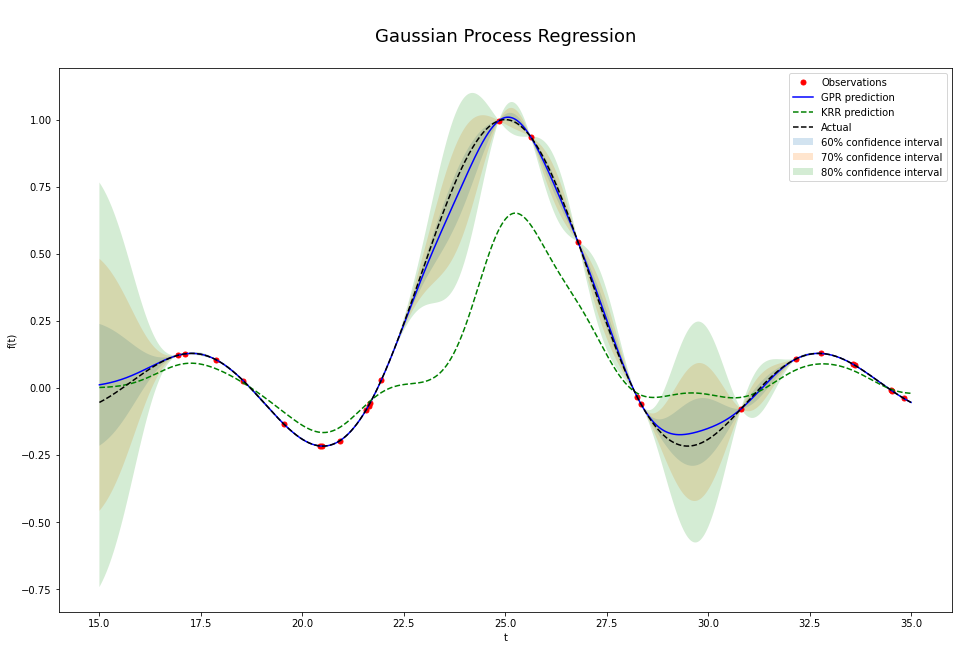

In [138]:
# Step 1: Generate sample data
n_observations = 25

def sinc(t,c):
    if t == c:
        return 1
    else:
        return math.sin(t-c)/(t-c)
c = 25
X_all = np.linspace(15,35,10000)
y_all = np.array([sinc(t,c) for t in X_all])
X_all = X_all.reshape(-1,1)

x = list(zip(X_all,y_all))
s = random.choices(x, k=n_observations)
X_train = np.array([s[0] for s in s]).reshape(-1,1)
y_train = np.array([s[1] for s in s]).reshape(-1,1)

# Step 2: Define the kernel
# Default kernel is used

# Step 3: Create the GaussianProcessRegressor object
gp = GaussianProcessRegressor(n_restarts_optimizer=10)

# Step 4: Fit the model to the data
gp.fit(X_train, y_train)

# Step 5: Make predictions
y_pred, sigma = gp.predict(X_all, return_std=True)
y_pred = y_pred.ravel()

# Step 6: Include KRR
krr = KernelRidge(kernel='rbf', alpha=1.0)
krr.fit(X_train, y_train)
y_pred_krr = krr.predict(X_all)

# Step 7: Define confidence intervals
quantile_90 = norm.ppf(0.60)  # 90% one-tailed
quantile_90_negative = norm.ppf(1-0.60)  # Negative quantile for symmetry
quantile_95 = norm.ppf(0.70)  # 95% one-tailed
quantile_95_negative = norm.ppf(1-0.70)  # Negative quantile for symmetry
quantile_99 = norm.ppf(0.80)  # 99% one-tailed
quantile_99_negative = norm.ppf(1-0.80)  # Negative quantile for symmetry

# Step 8: Plot the results
plt.figure(figsize=(16, 10))
plt.plot(X_train, y_train, 'r.', markersize=10, label='Observations')
plt.plot(X_all, y_pred, 'b-', label='GPR prediction')

# Plot KRR predictions
plt.plot(X_all, y_pred_krr, 'g--', label='KRR prediction')

# Plot actual function
plt.plot(X_all, y_all, '--', c='black' ,label='Actual')

# Plot 90% confidence interval
plt.fill_between(X_all.ravel(), y_pred - quantile_90 * sigma, y_pred + quantile_90 * sigma, alpha=0.2, label='60% confidence interval')

# Plot 95% confidence interval
plt.fill_between(X_all.ravel(), y_pred - quantile_95 * sigma, y_pred + quantile_95 * sigma, alpha=0.2, label='70% confidence interval')

# Plot 99% confidence interval
plt.fill_between(X_all.ravel(), y_pred - quantile_99 * sigma, y_pred + quantile_99 * sigma, alpha=0.2, label='80% confidence interval')

plt.title('\nGaussian Process Regression\n', fontsize=18)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

It is naturally an unfair comparison as the penality parameter of kernel ridge regression must be tuned via a cross-validation schema.

In [ ]:
sigma